Empezaremos utilizando datasets creados artificialmente que se encuentran localizados en la carpeta **datasets**, y dentro de la carpeta habrá 3 subcarpetas procedentes de los 3 tipos de encuestas:
* Autofinforme: **datasets/autoinforme**
* Familia: **datasets/familia**
* Profesionales: **datasets/profesional**

Como el clasificador sólo entiende tipos numéricos, todos los valores de los datasets son codificados a valores númericos.

Se espera que en el futuro, se puedan utilizar datasets de los psicólogos.

Para empezar, establecemos el tipo de fuente que queremos utilizar: autoinforme, familia o profesional.

In [11]:
# Establecer nombre del dataset y el tipo de modelo para las pruebas
# Posibles valores: autoinforme, familia o profesional
source = 'autoinforme'
datasetName = 'dataset1.csv'

# Preparación del dataframe
A continuación, cargamos el respectivo dataframe de la carpeta especificada.

Extraemos toda la información del dataset y lo guardamos en un dataframe de la librería *Pandas*. El contenido del dataframe es el siguiente:

In [12]:
import pandas as pd
df = pd.read_csv('datasets/' + source + '/' + datasetName)

df

,Index,Nombre,Edad,Curso,Peso,Altura,Sexo asignado,Transgenero,Nivel promedio del rendimiento academico,Situacion laboral madre,...,Familia reconstruida,Busqueda informacion autolesion,Compartir en RRSS pensamiento autolesion,Peticion ayuda en Internet,Contagio,Tener conocidos que comparten autolesion en Internet,Via de contacto para RRSS,Contacto informacion autolesion,Denuncia autolesion Internet,Desenlace
0,1,Tiffany Harris,14,ESO,76.58,114.97,Otro,Si,Suficiente,No trabaja,...,Si,No,Si,Si,No,Si,No,Si,Si,Comunicacion
1,2,Lana Parker,19,Formacion Profesional,52.66,121.01,Hombre,No,Insuficiente,Trabaja,...,No,No,Si,Si,Si,No,No,Si,Si,Deseo
2,3,Daisy Davis,17,ESO,51.60,182.69,Hombre,No,Notable,Trabaja,...,Si,No,No,No,No,No,No,Si,Si,Comunicacion
3,4,Rachel Anderson,17,Bachillerato,62.25,142.41,Otro,No estoy seguro de lo que se pregunta,Suficiente,Pensionado,...,Si,Si,Si,No,No,Si,Si,Si,Si,Deseo
4,5,Yui Price,22,Universidad,52.43,153.68,Otro,No,Insuficiente,Trabaja,...,Si,No,No,Si,No,Si,Si,No,No,Comunicacion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Luigi Allen,21,Formacion Profesional,74.42,192.53,Mujer,Si,Sobresaliente,No trabaja,...,No,No,No,Si,Si,Si,Si,Si,Si,Deseo
9996,9997,Theo Bryant,18,Formacion Profesional,82.92,129.61,Hombre,No estoy seguro de ser trans,Notable,Pensionado,...,No,Si,Si,Si,No,No,No,No,No,Ideacion
9997,9998,Dominic Wright,11,Colegio,89.83,182.60,Otro,No estoy seguro de lo que se pregunta,Extraordinario,Trabaja,...,No,Si,No,No,Si,No,Si,Si,No,Deseo
9998,9999,Steve Moore,20,Universidad,65.77,148.04,Mujer,No,Suficiente,No trabaja,...,Si,No,No,No,No,No,No,Si,No,Ideacion


## Decodificación del dataframe
Preparamos el dataframe para convertir los valores de las columnas a valores numéricos y borrar aquellas columnas que no son necesarias para la clasificación.

In [13]:

def codeAgeColumn(age):
    if age < 12:
        return 'MENOR DE 12'
    elif age > 21:
        return 'MAYOR DE 21'
    else:
        return str(age)

def codeHeightColumn(height):
    if height <= 149:
        return "MENOS DE 149"
    elif height >= 150 or height < 160:
        return "150-159"
    elif height >= 160 or height < 170:
        return "160-169"
    elif height >= 170 or height < 180:
        return "170-179"
    elif height >= 180 or height < 190:
        return "180-189"
    elif height >= 190:
        return "MAS DE 190"
    else:
        return False

def codeWeightColumn(weight):
    if weight <= 49:
        return "MENOS DE 49"
    elif weight >= 50 or weight < 60:
        return "50-59"
    elif weight >= 60 or weight < 70:
        return "60-69"
    elif weight >= 70 or weight < 80:
        return "70-79"
    elif weight >= 80 or weight < 90:
        return "80-89"
    elif weight >= 90:
        return "MAS DE 90"
    else:
        return False

def codeMonthlyFamiliarIncome(income):
    if income <= 499:
        return "MENOS DE 499"
    elif income >= 500 or income < 1000:
        return "500-999"
    elif income >= 1000 or income < 1500:
        return "1000-1499"
    elif income >= 1500 or income < 2000:
        return "1500-1999"
    elif income >= 2000 or income < 2500:
        return "2000-2499"
    elif income >= 2500:
        return "MAS DE 2500"
    else:
        return False

In [14]:
import constants
import numpy as np

def changeValuesToNumeric(df):
    newData = df.apply(lambda x: x.astype(str).str.upper())

    for key, values in constants.BAYES_NETWORK_STATE_NAMES.items():
        if key in newData and key != 'Desenlace':
            newData[key] = newData[key].apply(lambda x: values.index(x))

    
    return newData

In [15]:
def codeDataset(df):
    newDF = df

    # Eliminamos las columnas Index y Nombre, que no son necesarios
    newDF = newDF.drop(['Index', 'Nombre'], axis=1)

    # Metemos los valores dentro de rangos
    newDF['Edad'] = newDF['Edad'].apply(codeAgeColumn)
    newDF['Altura'] = newDF['Altura'].apply(codeHeightColumn)
    newDF['Peso'] = newDF['Peso'].apply(codeWeightColumn)

    # La columna 'Ingreso familiar mensual' sólo se encuentra en los datasets de profesionales
    if 'Ingreso familiar mensual' in newDF:
        newDF['Ingreso familiar mensual'] = newDF['Ingreso familiar mensual'].apply(codeMonthlyFamiliarIncome)
    
    # Codificamos los valores de todas las columnas a vlores numéricos
    newDF = changeValuesToNumeric(newDF)

    return newDF

In [16]:
df = codeDataset(df)
df

,Edad,Curso,Peso,Altura,Sexo asignado,Transgenero,Nivel promedio del rendimiento academico,Situacion laboral madre,Situacion laboral padre,Nivel profesional madre,...,Familia reconstruida,Busqueda informacion autolesion,Compartir en RRSS pensamiento autolesion,Peticion ayuda en Internet,Contagio,Tener conocidos que comparten autolesion en Internet,Via de contacto para RRSS,Contacto informacion autolesion,Denuncia autolesion Internet,Desenlace
0,3,1,1,0,2,0,1,0,2,1,...,0,1,0,0,1,0,1,0,0,COMUNICACION
1,8,4,1,0,0,1,0,1,0,2,...,1,1,0,0,0,1,1,0,0,DESEO
2,6,1,1,1,0,1,2,1,1,1,...,0,1,1,1,1,1,1,0,0,COMUNICACION
3,6,2,1,0,2,3,1,2,0,1,...,0,0,0,1,1,0,0,0,0,DESEO
4,11,3,1,1,2,1,0,1,1,0,...,0,1,1,0,1,0,0,1,1,COMUNICACION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10,4,1,1,1,0,3,0,1,1,...,1,1,1,0,0,0,0,0,0,DESEO
9996,7,4,1,0,0,2,2,2,0,0,...,1,0,0,0,1,1,1,1,1,IDEACION
9997,0,0,1,1,2,3,4,1,0,2,...,1,0,1,1,0,1,0,0,1,DESEO
9998,9,3,1,0,1,1,1,0,1,2,...,0,1,1,1,1,1,1,0,1,IDEACION


De este dataframe, se dividirán los datos de entrenamiento y de prueba. 

En este caso, un 75% de los datos serán de entrenamiento y el 25% restante serán de test. 

*X* representa las características del conjunto de datos

*y* representa las etiquetas del conjunto de datos.

random_state=1 para proporcionar una semilla para la generación de números aleatorios. De esta manera, la división no es la misma cada vez que se ejecute la función, lo que asegura que la división sea reproducible.



In [17]:
from sklearn.model_selection import train_test_split

numberColumns = len(df.columns) 

X, y = df.values[:,0:(numberColumns - 1)], df.values[:,(numberColumns - 1)]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Carga y entrenamiento del modelo seleccionado
Entrenamos al modelo usando el clasificador Näive-Bayes. En este caso, no es necesario especificar exactamente la estructura del modelo, porque los clasificadores de SciKit interpretan por defecto que todas las variables apuntan directamente a una sola.

Primero se comprobará si dentro de la carpeta de scripts ya existe un clasificador previo. Si existe, se carga, sino se crea uno nuevo. 

De esta manera, no tendremos que estar partiendo siempre de un clasificador vacío, sino que se entrena el clasificador previamente creado. 

In [18]:
from sklearn.naive_bayes import GaussianNB
import pickle
import os  

filePath = 'configFilesJupyter/'
filename = filePath + 'model_' + source + '.sav'

# Si existe un modelo previamente guardado, se carga, sino, se crea uno nuevo
if os.path.exists(filename):
    print('Existe un modelo anterior')
    clf_NB = pickle.load(open(filename, 'rb'))
    print('Modelo cargado')
else:
    print('Nuevo modelo')
    clf_NB = GaussianNB()

classNames = np.unique(df['Desenlace'].to_numpy())
clf_NB.partial_fit(X_train, y_train, classNames)

if os.path.exists(filePath) == False:
    os.mkdir(filePath)
    
#clf_NB = GaussianNB()
#clf_NB.fit(X_train, y_train)
# Guardamos el modelo en un archivo .pickle
pickle.dump(clf_NB, open(filename, 'wb'))


Nuevo modelo


# Predicción del modelo entrenado
Hacemos una predicción de los datos de testeo X_test

In [19]:
# Hacemos una prediccion de los datos de testing
y_pred = clf_NB.predict(X_test)

compareDF = pd.DataFrame()

compareDF['Real Result'] = y_test
compareDF['Predicted Result'] = y_pred
compareDF.head()

,Real Result,Predicted Result
0,FINALIDAD,DESEO
1,PLANIFICACION,COMUNICACION
2,COMUNICACION,PLANIFICACION
3,INTENCION,INTENCION
4,DESEO,DESEO


# Matriz de Confusión
Creamos la matriz de confusión. En este caso, los posibles resultados podían ser 0, 1 y 2 (columna *target*) --> setosa, versicolor, virginica (columna *target_names*). Por lo tanto, la matriz de resultado no sería una matriz 2x2 convencional, sino una 3x3.

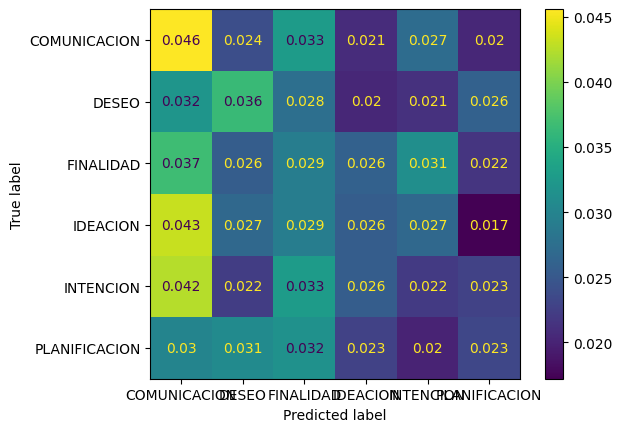

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import sys

classNames = np.unique(df['Desenlace'].to_numpy())

cm = confusion_matrix(y_test, y_pred, labels=classNames, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classNames)

disp.plot()
plt.show()



# Cálculo de la puntuación del entrenamiento
Ahora sí podemos calcular el nivel de acierto de la clasificación. 

Para ello, se pueden usar diferentes ratios.

* Exactitud - Accuracy
* Precisión
* Sensibilidad - Recall
* F1

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Exactitud - Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='micro'))
print('Sensibilidad - Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='micro'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='micro'))

Exactitud - Accuracy: 0.182
Precision: 0.182
Sensibilidad - Recall: 0.182
F1: 0.182


Como todos los indicadores tienen el mismo valor, entonces podemos escoger cualquiera. En este caso, escogemos el indicador de Exactitud - Accuracy.

In [ ]:
from sklearn.metrics import accuracy_score
print('Exactitud - Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))

Exactitud - Accuracy: 0.178


# Estimación del error del entrenamiento
Calculamos la estimación del error de la clasificación por Bootstraping.

In [ ]:
import numpy as np
# El proceso puede llevar un tiempo.
## Hacemos el entrenamiento de los clasificadores
NumRepeticiones = 100 # hacemos 100 muestras con bootstrap
NumMuestras = X_train.shape[0] # el número de muestras totales en X_train
indices = np.arange(X_train.shape[0]) # un listado con los índices de X_train 1,2,...,NumMuestras
clf_Boot = GaussianNB()
scores=[]

for rep in np.arange(NumRepeticiones):
    indicesNew = np.random.choice(indices,NumMuestras,replace=True) #nuevos indices cogidos al azar
    X_train_Boot = X_train[indicesNew] # tomamos los datos X de esos indices
    y_train_Boot = y_train[indicesNew] # y sus categorías
    clf_Boot.fit(X_train_Boot, y_train_Boot)
    scores.append(clf_Boot.score(X_test, y_test))
print('\nExactitud: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


Exactitud: 0.173 +/- 0.007


# Cálculo del Valor de P y la hipótesis nula
También podemos evaluar el nivel de nuestro clasificador, para saber si le clasificador que hemos escogido es el adecuado o no, o por lo tanto, probar otros tipos de clasificadores que nos den mejores resultados. Esto lo haremos mediante el cálculo del p-valor, es decir, la fracción de los datos aleatorios donde el rendimiento del clasificador es mejor que el original. Para calcularlo, se usará la técnica de **Bootstraping**, es decir, realizar una serie de muestras donde, en cada una, se crea un conjunto de datos aleatorio nuevo con respecto al original.


Primero calculamos la precisión inicial.

In [ ]:
## Entrenamiento inicial y toma del ACC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#clf_NB_1 = clf_NB
#clf_NB_1.fit(X_train, y_train)
#y_pred=clf_NB.predict(X_test)
#ACC_Ini = accuracy_score(y_true=y_test, y_pred=y_pred)
ACC_Ini = accuracy_score(y_true=y_test, y_pred=y_pred)
print('Exactitud - Accuracy Inicial: %.3f' % ACC_Ini)

Exactitud - Accuracy Inicial: 0.182


Luego calculamos la precisión en cada muestra, en este caso, 100 muestras, y se compara con el original. Si la precisión de la muestra es mayor que la original, se incrementa su contador (*Cont*).

Para que el cálculo sea válido, es necesario que en cada muestra, el subconjunto de entrenamiento debe ser diferente en cada una. Para ello, se generan índices aleatorios en cada muestra para generar subconjuntos diferentes. Los índices se pueden repetir. 

En este caso, el p-valor es muy pequeño, por lo tanto, podemos concluir que la precisión inicial es mejor que la gran mayoría de las precisiones calculadas en las muestras. Por lo tanto, nuestro clasificador no ha dado predicciones correctas por pura suerte, anulando así la hipótesis nula. 

In [ ]:
import numpy as np
## Hacemos el entrenamiento de los clasificadores
NumRepeticiones = 100 # hacemos 100 muestras con bootstrap
NumMuestras = X_train.shape[0] # el número de muestras totales en X_train
indices = np.arange(X_train.shape[0]) # un listado con los índices de X_train 1,2,...,NumMuestras
clf_Boot = clf_NB
Cont = 0

i=0

for rep in np.arange(NumRepeticiones):
    indicesNew = np.random.choice(indices,NumMuestras,replace=True) #nuevos indices cogidos al azar
    X_train_Boot = X_train[indicesNew] # tomamos los datos X de esos indices
    y_train_Boot = y_train[indicesNew] # y sus categorías
    
    clf_Boot.fit(X_train_Boot, y_train_Boot)
    
    i+=1
    
    if clf_Boot.score(X_test, y_test) > ACC_Ini:
        Cont +=1

p_valor = (Cont+1)/(NumRepeticiones + 1)
p_valor, Cont

(0.12871287128712872, 12)